Hamza Mhadi 


January 2021 

Homework # 3 - Python/Pandas

In [2]:
# Initial imports 

import pandas as pd 
import numpy as np 
import datetime as dt 
from pathlib import Path 

%matplotlib inline 

Part 1 - Read in Data and Cleanse Data 

In [3]:
# Read the Whale Portfolio daily returns 

whale_returns = pd.read_csv('whale_returns.csv', index_col='Date', parse_dates=True, infer_datetime_format=True)


In [4]:
#Count Nulls for Whale Portfolio daily returns 

whale_returns.isnull().mean()*100

SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

In [5]:
#Drop nulls for Whale Portfolio daily returns 

whale_returns = whale_returns.dropna()

In [6]:
#Reading algorithmic returns 

algo_returns = pd.read_csv('algo_returns.csv', index_col='Date', parse_dates=True, infer_datetime_format=True)


In [7]:
#Count nulls for algorithmic returns 

algo_returns.isnull().mean()*100

Algo 1    0.000000
Algo 2    0.483481
dtype: float64

In [8]:
#Drop nulls for algorithmic returns 
algo_returns = algo_returns.dropna()


In [9]:
#Reading S&P 500 closing prices 

sp500_history = pd.read_csv('sp500_history.csv', index_col='Date', parse_dates=True, infer_datetime_format=True)


In [10]:
#Check the Data Types for S&P 500 closing prices 
sp500_history['Close'].head()

Date
2019-04-23    $2933.68
2019-04-22    $2907.97
2019-04-18    $2905.03
2019-04-17    $2900.45
2019-04-16    $2907.06
Name: Close, dtype: object

In [11]:
#Fix Data Types for S&P 500 closing prices 

sp500_history['Close'] = sp500_history['Close'].str.replace('$', '')
sp500_history['Close'] = sp500_history['Close'].astype('float')
sp500_history['Close'].head()

Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
Name: Close, dtype: float64

In [12]:
#Calculate S&P 500 Daily returns and drop null values 

sp500_dailyreturns = sp500_history.pct_change().dropna()
sp500_dailyreturns

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [13]:
#Rename 'Close' Column to be specific to this portfolio 

sp500_dailyreturns.columns = ['sp500']



In [14]:
#Join Whale Returns, Algorithmic Returns, and the S&P 500 returns into a single DataFrame with columns for each portfolio return 

combined_df = pd.concat([whale_returns,algo_returns,sp500_dailyreturns], axis="columns", join="inner")
combined_df


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


Part 2: Conduct Quantitative Analysis 

<AxesSubplot:title={'center':'Daily returns'}, xlabel='Date'>

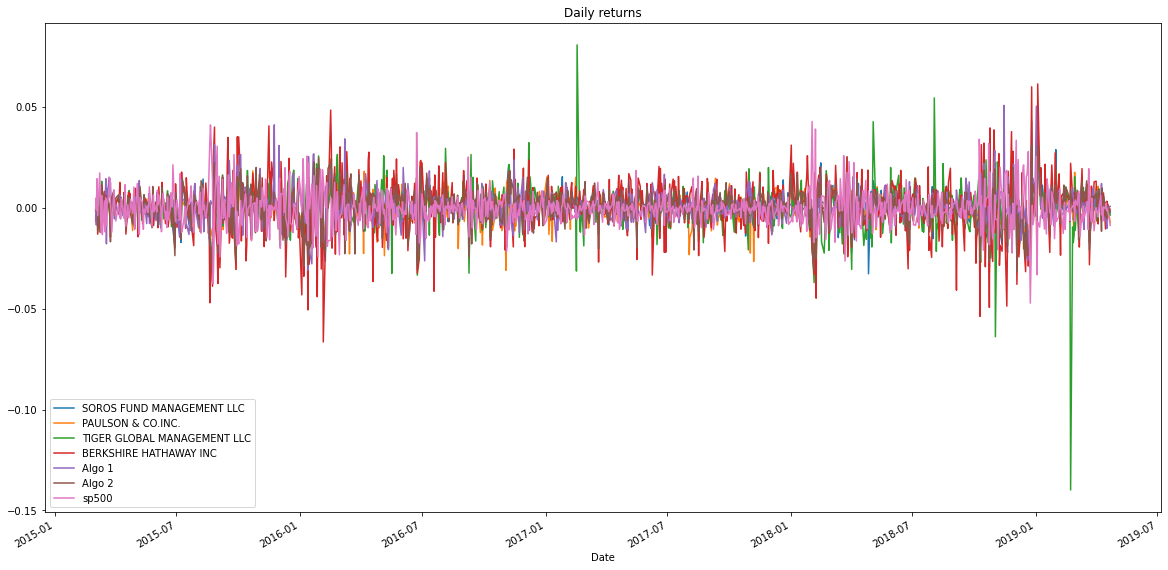

In [16]:
# Plot daily returns of all portfolios 

combined_df.plot(figsize=(20,10), title = "Daily returns")

In [17]:
#Calculate cumulative returns of all portfolios 

cumulative_returns = (1 + combined_df).cumprod() 
cumulative_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,1.004408
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,1.003208
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,1.017632
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,1.013634
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,1.031123
...,...,...,...,...,...,...,...
2019-04-15,1.157839,0.786506,0.862797,1.525584,1.958591,1.264103,0.725056
2019-04-16,1.160965,0.786811,0.862080,1.526861,1.944990,1.267768,0.726708
2019-04-17,1.157602,0.781723,0.858279,1.531781,1.924954,1.261140,0.725562


<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

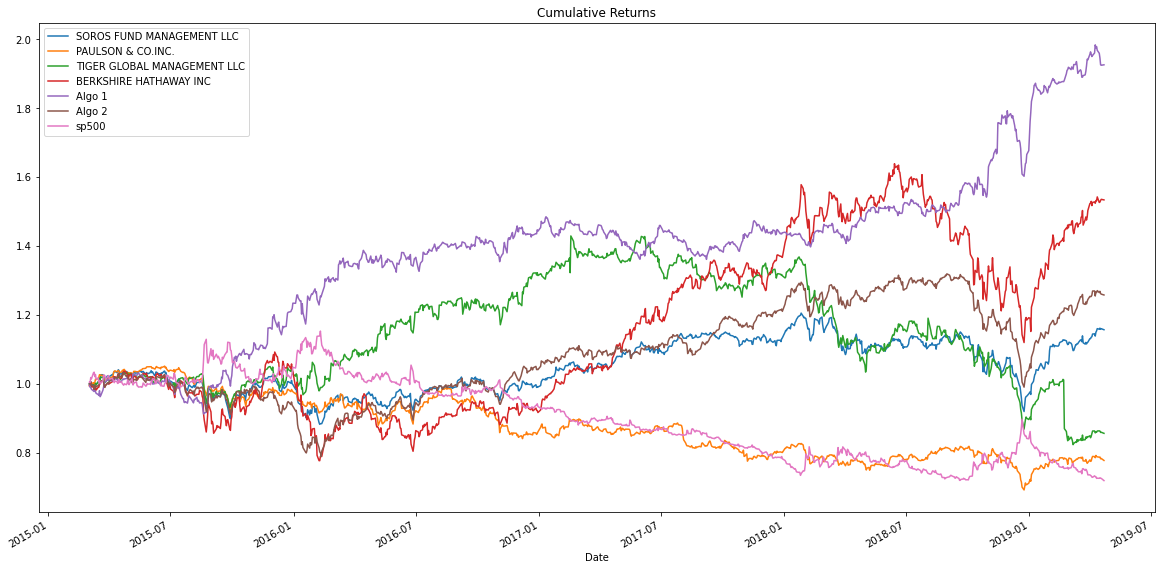

In [18]:
#Plot cumulative returns 

cumulative_returns.plot(figsize=(20,10), title="Cumulative Returns")

Part 3 - Risk Analysis 

<AxesSubplot:>

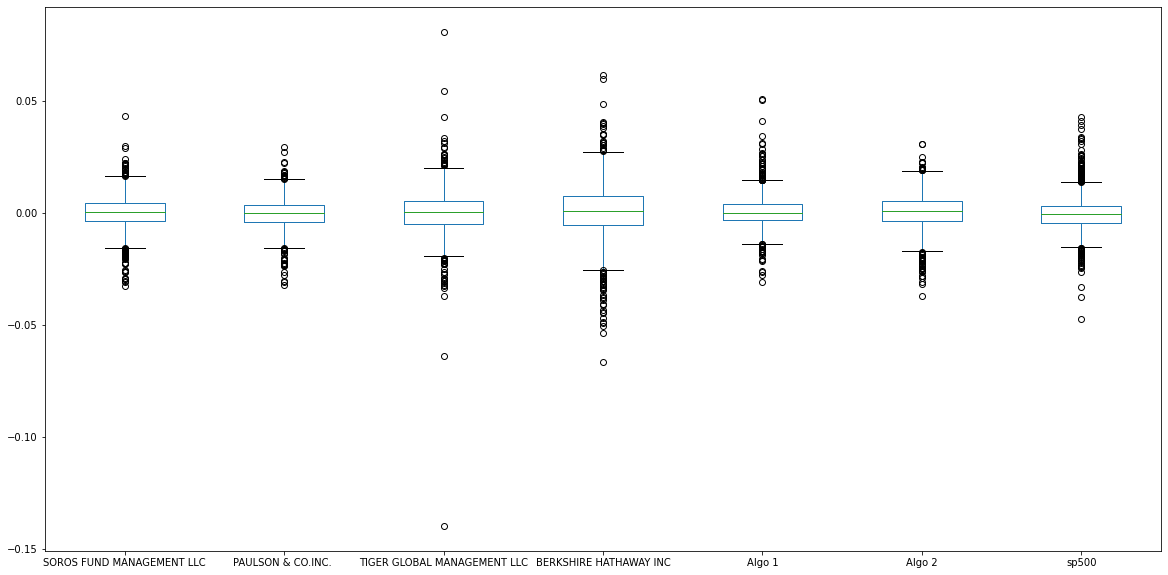

In [20]:
#Create a box plot for each portfolio to show risk 

#daily_std = combined_df.std()
#annualized_std = daily_std * np.sqrt(252)
#boxplot = annualized_std.boxplot()
#annualized_std.box.plot()
combined_df.plot.box(figsize=(20,10))

In [22]:
#Calculate the daily standard deviation of S&P 500 
sp500_risk =combined_df["sp500"].std()
sp500_risk

0.00858688974707399

In [24]:
#Determine which portfolios are riskier than S&P 500 
combined_df.std()

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
sp500                          0.008587
dtype: float64

In [25]:
#Based on the below the "riskier" portfolios than the S&P 500 are Berkshire Hathway and Tiger Global Management because it has a higher daily std 
combined_df.std() > sp500_risk

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
sp500                          False
dtype: bool

In [27]:
#Calculate the annualized standard deviation (252 trading days)

annualized_std = combined_df.std() * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
sp500                          0.136313
dtype: float64

Rolling Statistics 

<AxesSubplot:title={'center':'21 day rolling std for all portfolios'}, xlabel='Date'>

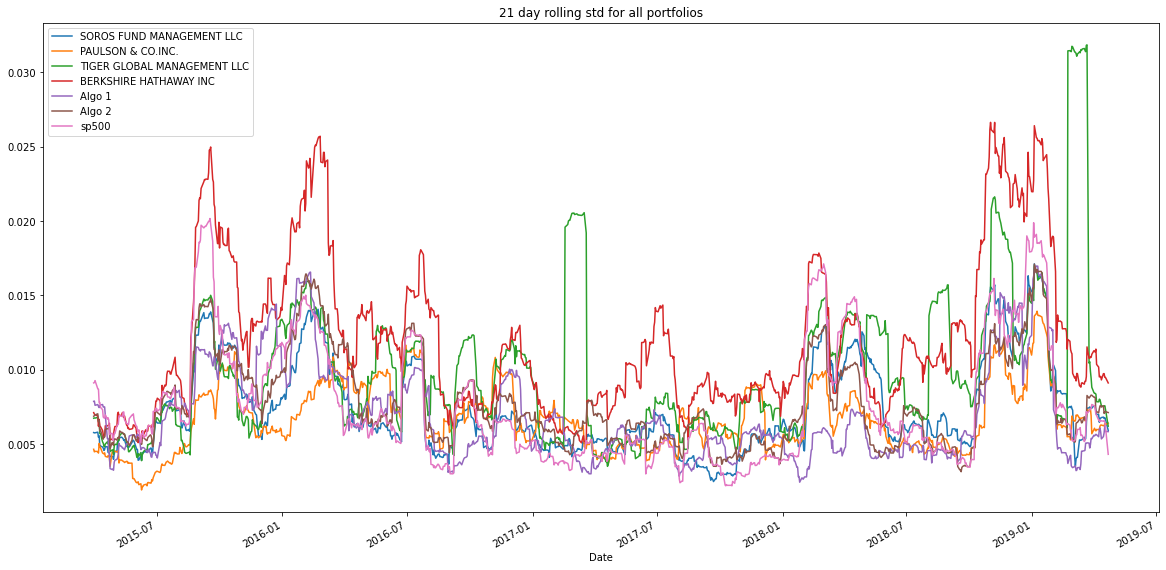

In [28]:
#Calculate and plot the rolling standard deviation for all portfolios using a 21-day window 

combined_df.rolling(window=21).std().dropna().plot(figsize=(20,10), title="21 day rolling std for all portfolios")

In [29]:
#Calculate the correlation 

correlation = combined_df.corr()


<AxesSubplot:>

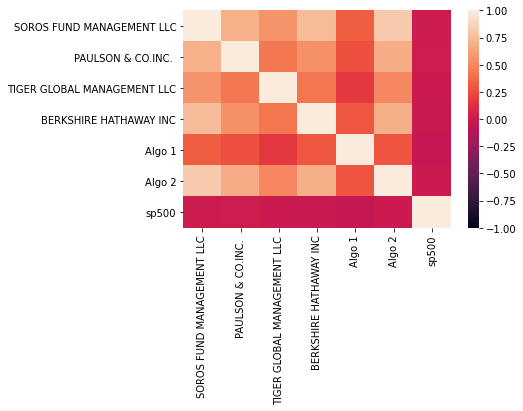

In [65]:
#Display the correlation matrix 

import seaborn as sns
sns.heatmap(correlation, vmin=-1, vmax=1)

In [147]:
#Calculate and Plot Beta for a chosen portfolio and the S&P 500 

#Calculate covariance of a single portfolio 

bh_covariance = combined_df["BERKSHIRE HATHAWAY INC"].cov(combined_df["sp500"])

In [148]:
#Calculate variance of S&P 500 

variance = combined_df["sp500"].var()

In [77]:
#Computing Beta 

bh_beta = bh_covariance / variance
bh_beta

-0.020846489408902668

<AxesSubplot:title={'center':'Plot Berkshire Hataway Beta'}, xlabel='Date'>

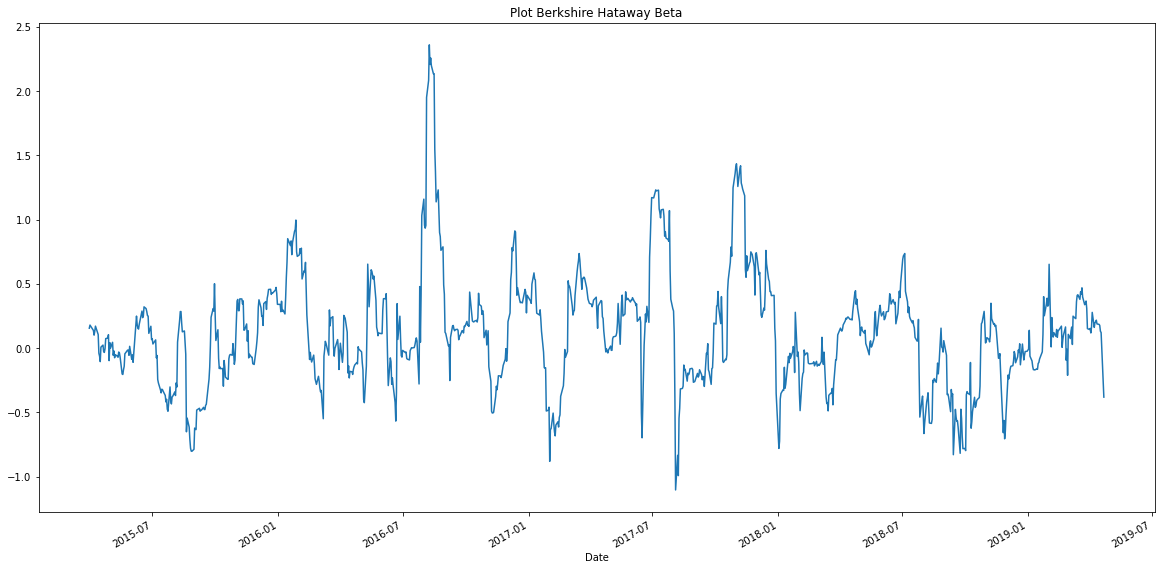

In [30]:
#Plot Beta Trend 

rolling_bh_covariance = combined_df["BERKSHIRE HATHAWAY INC"].rolling(window=21).cov(combined_df["sp500"])
rolling_variance = combined_df["sp500"].rolling(window=21).var()
rolling_bh_beta = rolling_bh_covariance/rolling_variance 
rolling_bh_beta.plot(figsize=(20,10), title="Plot Berkshire Hataway Beta")

Sharpe Ratios 

In [32]:
sharpe_ratios = (combined_df.mean()*252)/ (combined_df.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
sp500                         -0.518582
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

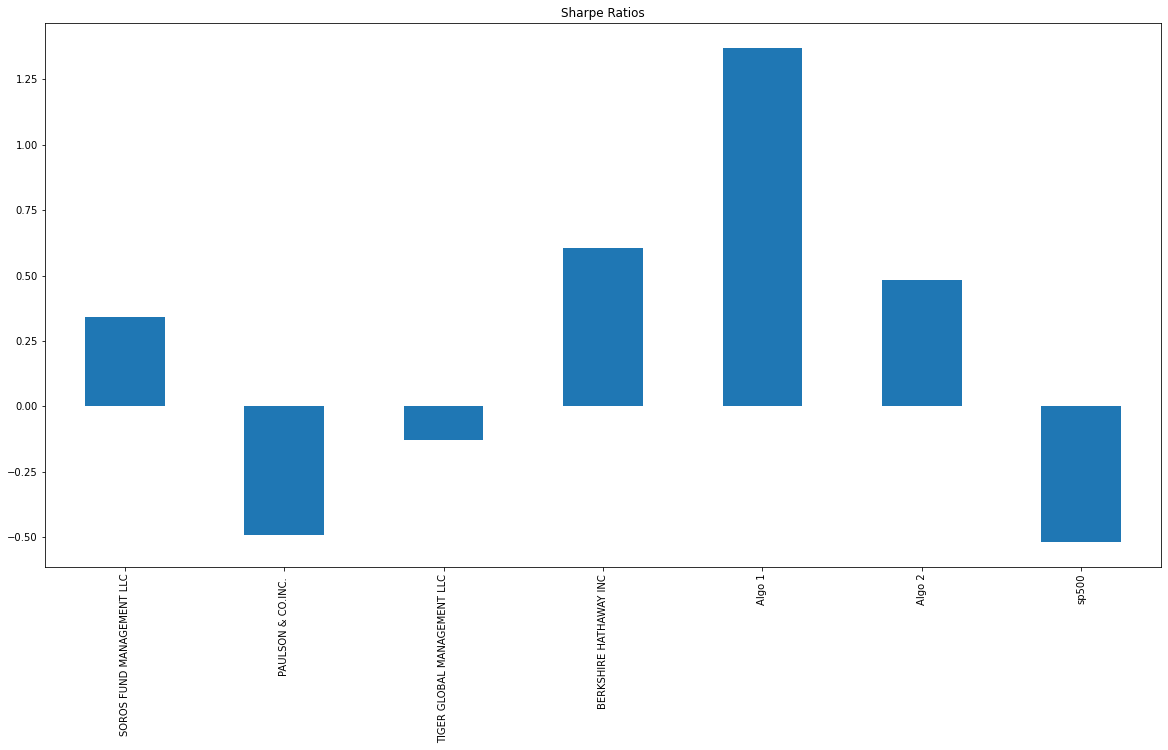

In [33]:
#Plot sharpe ratios 

sharpe_ratios.plot(figsize=(20,10),kind="bar", title="Sharpe Ratios")

Determine whether the algorithim strategies outperform both the market (S&P 500) and the whales portfolio 

-Yes, especially Algo 1 (Algo 2 is comparable to BH and Soros returns) 

-----

Create Custom Portfolio 

In [38]:
# Read in data from 1st, 2nd , and 3rd stocks 

goog = pd.read_csv('goog_historical.csv', index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
cost = pd.read_csv('cost_historical.csv', index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
aapl = pd.read_csv('aapl_historical.csv', index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)

In [39]:
#Combine all stocks in a single DataFrame 
portfolio_df = pd.concat([goog, cost, aapl], axis="rows", join="inner")
portfolio_df.reset_index() #Reset index 
portfolio_df = portfolio_df.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol") #Reorganize portfolio daa by having a column per symbol 
portfolio_df.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [40]:
#Calculate daily returns, drop null values, and display sample data 

portfolio_dr = portfolio_df.pct_change().dropna()

In [41]:
#Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock 

aapl_weight = 1/3 
cost_weight = 1/3 
goog_weight = 1/3 

portfolio_returns = aapl_weight*portfolio_dr["AAPL"] + cost_weight*portfolio_dr["COST"] + goog_weight*portfolio_dr["GOOG"]
portfolio_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

In [42]:
#Join your portfolio returns to the DataFrame that contains all of the portfolio returns 

final_df = pd.concat([combined_df,portfolio_returns],axis="columns",join="inner") #No null values 
final_df.rename(columns ={0: "Hamza Portfolio"}, inplace=True)
final_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500,Hamza Portfolio
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333,-0.006061


In [43]:
#Calculate the annualized standard deviation 

final_daily_std = final_df.std()
final_ann_std = final_daily_std * np.sqrt(252)
final_ann_std

SOROS FUND MANAGEMENT LLC      0.146812
PAULSON & CO.INC.              0.116928
TIGER GLOBAL MANAGEMENT LLC    0.232898
BERKSHIRE HATHAWAY INC         0.247305
Algo 1                         0.133927
Algo 2                         0.139499
sp500                          0.152469
Hamza Portfolio                0.211627
dtype: float64

<AxesSubplot:title={'center':'Plotting Rolling 21-Day Standard Deviation'}>

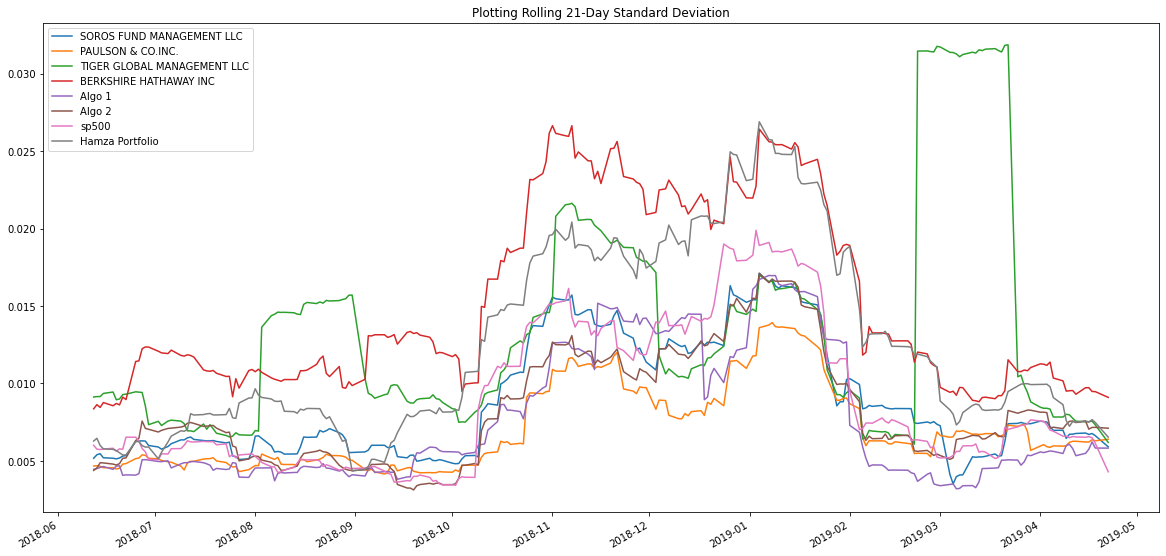

In [44]:
#Calculate rolling standard deviation and plot 

final_df.rolling(window=21).std().dropna().plot(figsize=(20,10), title="Plotting Rolling 21-Day Standard Deviation")

<AxesSubplot:title={'center':'Rolling 60 Day Beta for Hamza Portfolio vs S&P 500'}>

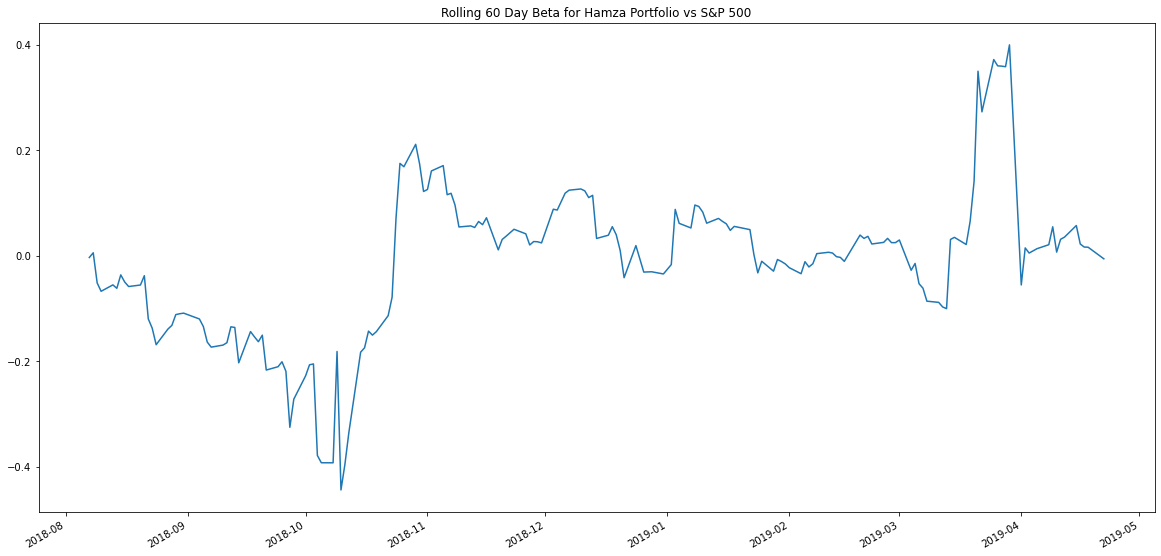

In [45]:
#Calculate and plot Rolling 60 day Beta for your portfolio compared to the S&P 500 

rolling_hamza_covariance = final_df["Hamza Portfolio"].rolling(window=60).cov(final_df["sp500"])
rolling_variance_2 = final_df["sp500"].rolling(window=60).var()
rolling_bh_beta = rolling_hamza_covariance/rolling_variance_2 
rolling_bh_beta.plot(figsize=(20,10), title="Rolling 60 Day Beta for Hamza Portfolio vs S&P 500")

In [46]:
#Using the daily returns calculate and visualize the Sharpe ratios using a bar chart 

sharpe_ratios_2 = (final_df.mean()*252)/ (final_df.std()*np.sqrt(252))


<AxesSubplot:title={'center':'Sharpe Ratios'}>

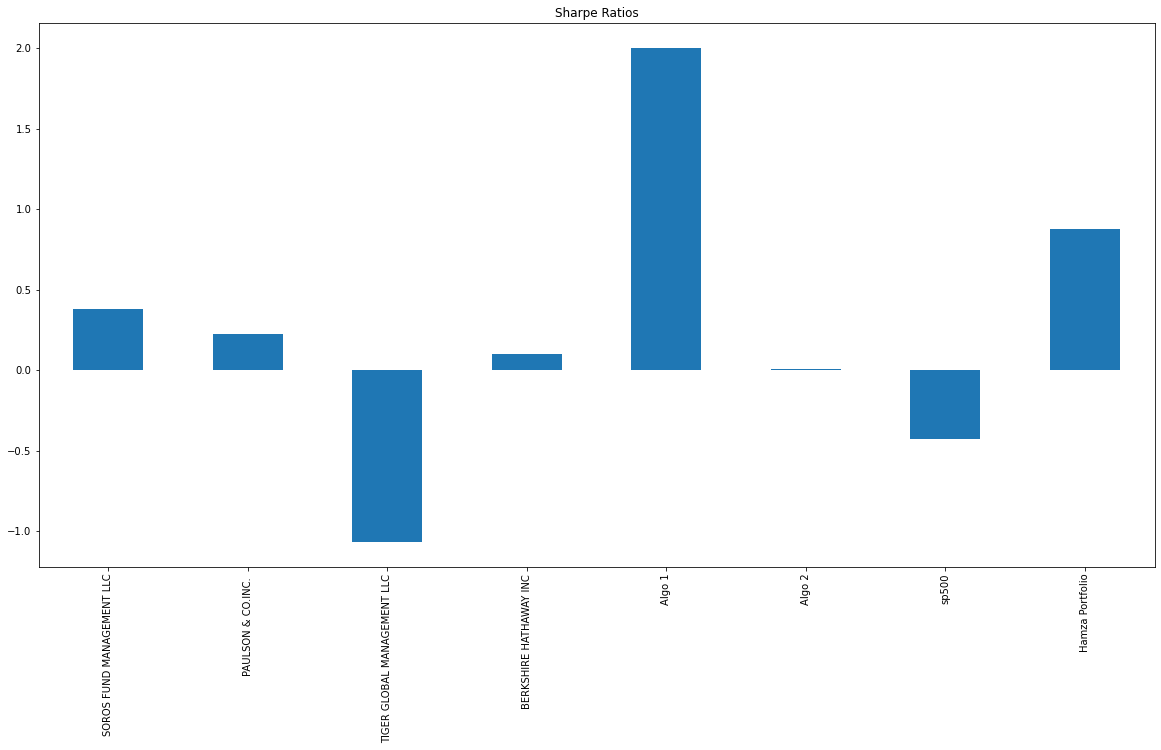

In [47]:
#Plot the Sharpe ratios 

sharpe_ratios_2.plot(figsize=(20,10),kind="bar", title="Sharpe Ratios")

How does your portfolio do? 

IT BEATS ALL OTHER PORTFOLIOS IN SHARPE RATIO except for ALGO 1 PORTFOLIO 